# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observation : 
    Trend1: Temperature with Latitude
* The temperature and the latitude are correlated. Meaning that, when the Latitude increases or decreases the Temperature changes correspondingly. 

    Trend2:
* The Northern Hemisphere Linear regression shows that it has strong negative corrlation with temperature.When latitude 
increases the temperature decreases. 
* The Southern Hemisphere Linear regression shows that it has strong positive corrlation with temperature.When the latitude
increases the temperature increases. 

    Trend3: Humidity,Cloudiness and Windspeed with Latitude
* The Humidity,cloudiness and wind speed shows weak or no relationship with Latitude.Which means the Increase in latitude less
likely will impact the humidity,cloudiness and windspeed.  


In [1]:
# Dependencies
import pandas as pd
import requests
import json
import random
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
import scipy.stats as st
import gmaps

# API -Keys config
from citipy import citipy
from api_keys import weather_api_key,g_key

# pretty print the output
from pprint import pprint 

## Generate Cities List and Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Creating a weather data frame columns
cities_df = pd.DataFrame(columns=['City_Name','Country_Code','Date','Latitude','Longitude','Temperature','Humidity','Cloudiness','Wind_Speed'])

# weather API base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# initialize the counter for while loop
i = 1
# while loop runs utill the conditions met
while(i <= 600):
    
    # generate some random latitude (integers)
    lat = randint(-90, 90)
    # generate some random longitude(integers) 
    lng = randint(-180, 180)
    
    #calling citypy to get the cityname and country code for the given lat and lng
    city = citipy.nearest_city( lat, lng)
    city_name = city.city_name
    country_code = city.country_code
    
    #Build the query url     
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city_name +"," + country_code + "&units=Imperial"
    try:
       # Get weather data
        weather_response = requests.get(query_url)
    
        #check for the response 200 then proceed,
        if weather_response is not None and weather_response.status_code == 200:
            weather_json = weather_response.json()
            cities_df.loc[i] = [city_name,country_code,weather_json['dt'],weather_json['coord']['lat'],weather_json['coord']['lon'],weather_json['main']['temp'],weather_json['main']['humidity'],weather_json['clouds']['all'],weather_json['wind']['speed']]
            print(f"{i},{city_name},{country_code}")
            #increment the counter        
            i += 1
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        print("----------")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
cities_df.to_csv("../output_data/cities.csv", encoding="utf-8")

#Display the DataFrame
cities_df.head(600)

,City_Name,Country_Code,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind_Speed
1,fairbanks,us,1619894315,64.8378,-147.7164,32.90,51,90,4.61
2,victoria,sc,1619894328,-4.6167,55.4500,82.40,78,40,2.30
3,tomatlan,mx,1619894328,19.9333,-105.2500,92.08,29,0,12.12
4,presidencia roque saenz pena,ar,1619894328,-26.7852,-60.4388,84.99,50,0,3.00
5,la asuncion,ve,1619894329,11.0333,-63.8628,95.00,49,99,18.41
...,...,...,...,...,...,...,...,...,...
596,batagay,ru,1619894492,67.6333,134.6333,28.29,86,100,3.62
597,kodiak,us,1619894493,57.7900,-152.4072,39.20,81,1,4.61
598,hobbs,us,1619894493,32.7026,-103.1360,70.63,42,20,5.75
599,tadpatri,in,1619894494,14.9167,78.0167,85.14,52,4,10.42


In [32]:
cities_df.describe()

,Latitude,Longitude,Temperature,Wind_Speed
count,600.000000,600.000000,600.000000,600.000000
mean,5.305489,2.561331,58.579583,8.136833
std,41.023440,104.360662,19.746691,5.605556
min,-54.800000,-175.200000,0.810000,0.360000
25%,-33.590600,-73.784975,46.177500,3.485000
50%,-3.004150,5.889500,59.000000,6.910000
75%,43.908600,102.741400,75.510000,11.810000
max,77.484000,178.416700,102.420000,35.680000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
#  Get the indices of cities that have humidity over 100%.
# indices = cities_df[cities_df['Humidity'] > 100]
# indices.head()

In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean up the df by dropping cities that weren't found

clean_city_data = cities_df.dropna(inplace=True)
clean_city_data = cities_df.reset_index(drop=True)
print(len(clean_city_data['City_Name']))

600


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

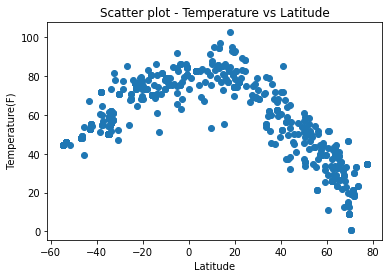

In [61]:
# Generate a scatter plot of Latitude Vs.Temperature
lat_data = cities_df[["Latitude"]]
temp_data = cities_df[['Temperature']]
temp_data
lat_data
plt.scatter(lat_data,temp_data)
plt.title("Scatter plot - Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel(" Temperature(F)")
plt.savefig("../output_data/temperature.png")
plt.show()

## observation: Scatter plot - Lattitude vs. Temperature 
1) The above scatter plot shows the relationship of Latitude and Max Temperature. The position of each dot on the horizandal and vertical axis indicates the values for an individual datapoint.

2) This scatter plot shows the strong non-linear relationship between Latitude and Temperature.Around the equator the temperatures are high and when you move away from equator the temperatures are going downwards. 

## Latitude vs. Humidity Plot

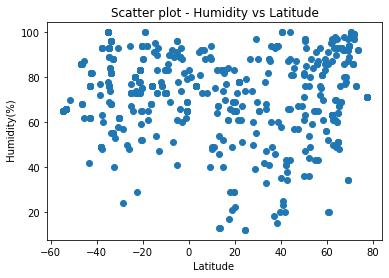

In [36]:
# Generate a humidity scatter plot
lat_data = cities_df[["Latitude"]]
humidity_data = cities_df[['Humidity']]
humidity_data
lat_data
plt.scatter(lat_data,humidity_data)
plt.title("Scatter plot - Humidity vs Latitude")
plt.xlabel("Latitude ")
plt.ylabel(" Humidity(%)")
plt.savefig("../output_data/humidity.png")
plt.show()

## observation: Scatter plot - Lattitude vs. Humidity
* The above scatter plot shows the relationship Latitude and Humidity. The position of each dot on the horizandal and vertical axis indicates the values for an individual datapoint.

* This scatter plot shows the relationship between Latitude and Humidity.Near equator(Latitude-0) the humidity is high. 

## Latitude vs. Cloudiness Plot

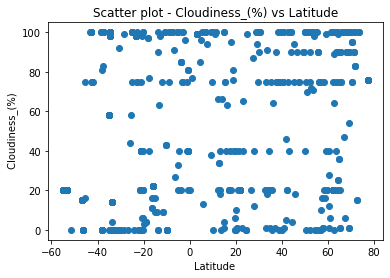

In [37]:
# Generate a Cloudiness scatter plot
lat_data = cities_df[["Latitude"]]
cloudiness_data = cities_df[['Cloudiness']]
cloudiness_data
lat_data
plt.scatter(lat_data,cloudiness_data)
plt.title("Scatter plot - Cloudiness_(%) vs Latitude")
plt.xlabel("Latitude ")
plt.ylabel(" Cloudiness_(%)")
plt.savefig("../output_data/cloudiness.png")
plt.show()

## observation: Scatter plot - Lattitude vs. Cloudiness
* This scatter plot shows the relationship between Latitude and Cloudiness. It shows the less relationship between the two variables. Near Latitude 0 (equator) the cloudiness is less. when you move over to Latitude 40,60 and -40,-60 are more cloudy. 

## Latitude vs. Wind Speed Plot

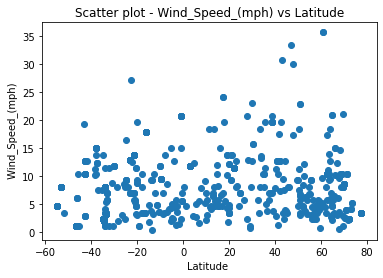

In [38]:
# Generate a Wind Speed scatter plot
lat_data = cities_df[["Latitude"]]
wind_Speed_data = cities_df[['Wind_Speed']]
wind_Speed_data
lat_data
plt.scatter(lat_data,wind_Speed_data)
plt.title("Scatter plot - Wind_Speed_(mph) vs Latitude")
plt.xlabel("Latitude ")
plt.ylabel(" Wind_Speed_(mph)")
plt.savefig("../output_data/Wind_Speed.png")
plt.show()

## observation: Scatter plot - Lattitude vs. Wind Speed
* This scatter plot shows the relationship between Latitude and Wind Speed.The Latitude near 0 (equator) and +60 and -60 the wind is more between 0 to 15 mph. 

## Linear Regression

In [46]:
# Filter the Latitude to generate Northern Hemisphere data frame
northern_hemisphere = cities_df[cities_df['Latitude'] >= 0].reset_index(drop = True)
northern_hemisphere_df = northern_hemisphere[['City_Name','Country_Code',"Latitude","Temperature","Humidity","Cloudiness","Wind_Speed"]] 
# northern_hemisphere_df.reset_index(drop = True)
northern_hemisphere_df.head()

# Filter the Latitude to generate Northern Hemisphere data frame
southern_hemisphere = cities_df[cities_df['Latitude'] < 0].reset_index(drop = True)
southern_hemisphere_df = southern_hemisphere[['City_Name','Country_Code',"Latitude","Temperature","Humidity","Cloudiness","Wind_Speed"]] 
southern_hemisphere_df.head()


,City_Name,Country_Code,Latitude,Temperature,Humidity,Cloudiness,Wind_Speed
0,victoria,sc,-4.6167,82.40,78,40,2.30
1,presidencia roque saenz pena,ar,-26.7852,84.99,50,0,3.00
2,arraial do cabo,br,-22.9661,73.40,73,75,6.91
3,albany,au,-35.0169,50.00,100,58,2.30
4,bluff,nz,-46.6000,48.00,86,15,1.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8147191895024835


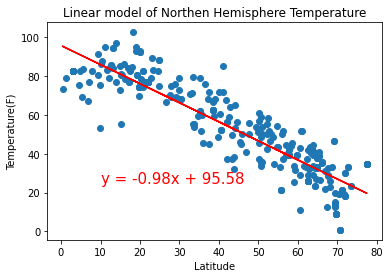

The correlation coefficient between Latitude and Temperature value is -0.9


In [60]:
# Add the linear regression equation and line to plot for Northen Hemisphere Temperature 
# x and y axis of the scatter plot

x_values  = northern_hemisphere_df["Latitude"].astype(str).astype(float)
y_values = northern_hemisphere_df['Temperature'].astype(str).astype(float)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.title("Linear model of Northen Hemisphere Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Caculate correlation coefficient
corr_coefficient = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation coefficient between Latitude and Temperature value is {corr_coefficient}')

## Observation:  Northern Hemisphere Linear regression (Lattitude vs. Temperature)
* The above linear regression model shows the relationship of Latitude and Temperature. 

* The correlation coefficient is -0.91. That means, there is a Strong negative correlation between two variables. 
If Lattitude increases the temperature decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7654698368090528


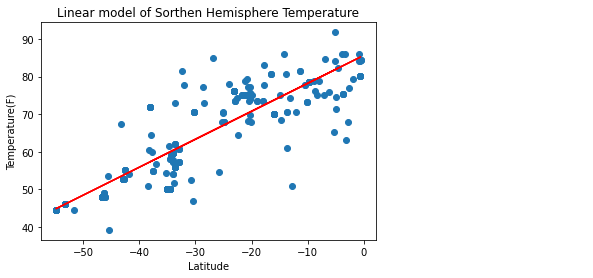

The correlation coefficient between Latitude and Temperature value is 0.87


In [59]:
# Add the linear regression equation and line to plot for Sorthen Hemisphere Temperature 
# x and y axis of the scatter plot

x_values  = southern_hemisphere_df["Latitude"].astype(str).astype(float)
y_values = southern_hemisphere_df['Temperature'].astype(str).astype(float)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,38),fontsize=15,color="red")
plt.title("Linear model of Sorthen Hemisphere Temperature")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Caculate correlation coefficient
corr_coefficient = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation coefficient between Latitude and Temperature value is {corr_coefficient}')

## Observation:  Southern Hemisphere Linear regression(Lattitude vs. Temperature)
* The above linear regression model shows the relationship of Latitude and Temperature. 

* The correlation coefficient is 0.87. That means, there is a strong positive correlation between two variables. 
If Lattitude increases the temperature increases.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04893270724093037


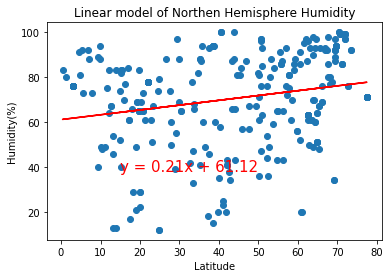

The correlation coefficient between Latitude and Humidity value is 0.22


In [58]:
# Add the linear regression equation and line to plot for Northen Hemisphere Humidity
# x and y axis of the scatter plot

x_values  = northern_hemisphere_df["Latitude"].astype(str).astype(float)
y_values = northern_hemisphere_df['Humidity'].astype(str).astype(float)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,38),fontsize=15,color="red")
plt.title("Linear model of Northen Hemisphere Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Caculate correlation coefficient
corr_coefficient = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation coefficient between Latitude and Humidity value is {corr_coefficient}')

## Observation:  Northern Hemisphere Linear regression (Lattitude vs. Humidity)
* The above linear regression model shows the relationship of Latitude and Humidity. 

* The correlation coefficient is 0.22. That means, there is a weak positive correlation between two variables lattitude and
Humidity in the Northern Hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.009111902980137122


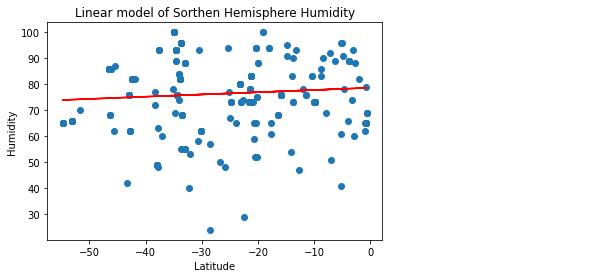

The correlation coefficient between Latitude and Humidity value is 0.1


In [52]:
# Add the linear regression equation and line to plot for Sorthen Hemisphere Humidity
# x and y axis of the scatter plot

x_values  = southern_hemisphere_df["Latitude"].astype(str).astype(float)
y_values = southern_hemisphere_df['Humidity'].astype(str).astype(float)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,38),fontsize=15,color="red")
plt.title("Linear model of Sorthen Hemisphere Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Caculate correlation coefficient
corr_coefficient = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation coefficient between Latitude and Humidity value is {corr_coefficient}')

## Observation:  Southern Hemisphere Linear regression (Lattitude vs. Humidity)
1) The above linear regression model shows the relationship of Latitude and Humidity. 

2) The correlation coefficient is 0.1. That means, there is no or neglegible relationship between two variables lattitude and
Humidity in the southern Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02300862217066694


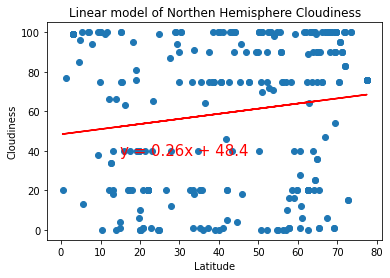

The correlation coefficient between Latitude and Cloudiness value is 0.15


In [53]:
# Add the linear regression equation and line to plot for Northen Hemisphere Cloudiness
# x and y axis of the scatter plot

# casting using astype of method
x_values  = northern_hemisphere_df["Latitude"].astype(str).astype(float)
y_values = northern_hemisphere_df['Cloudiness'].astype(str).astype(float)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,38),fontsize=15,color="red")
plt.title("Linear model of Northen Hemisphere Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Caculate correlation coefficient
corr_coefficient = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation coefficient between Latitude and Cloudiness value is {corr_coefficient}')

## Observation:  Northern Hemisphere Linear regression (Lattitude vs. Cloudiness)
* The above linear regression model shows the relationship of Latitude and Cloudiness. 

* The correlation coefficient is 0.15. That means, there is a no or nelegible relationship between two variables lattitude and
Cloudiness in the Northern Hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05823285585610659


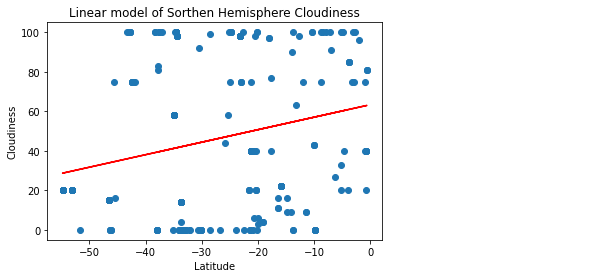

The correlation coefficient between Latitude and Cloudiness value is 0.24


In [55]:
# Add the linear regression equation and line to plot for Sorthen Hemisphere Cloudiness
# x and y axis of the scatter plot

# casting using astype of method
x_values  = southern_hemisphere_df["Latitude"].astype(str).astype(float)
y_values = southern_hemisphere_df['Cloudiness'].astype(str).astype(float)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,38),fontsize=15,color="red")
plt.title("Linear model of Sorthen Hemisphere Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Caculate correlation coefficient
corr_coefficient = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation coefficient between Latitude and Cloudiness value is {corr_coefficient}')

## Observation:  Sothern Hemisphere Linear regression (Lattitude vs. Cloudiness)
* The above linear regression model shows the relationship of Latitude and Cloudiness. 

* The correlation coefficient is 0.24. That means, there is a weak positive relationship between two variables lattitude and
Cloudiness in the Southern Hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01609690402080241


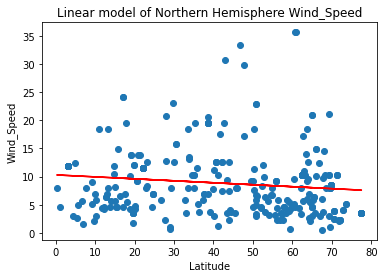

The correlation coefficient between Latitude and Wind_Speed value is -0.13


In [56]:
# Add the linear regression equation and line to plot for Northen Hemisphere Wind_Speed
# x and y axis of the scatter plot

# casting using astype of method
x_values  = northern_hemisphere_df["Latitude"].astype(str).astype(float)
y_values = northern_hemisphere_df['Wind_Speed']


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,38),fontsize=15,color="red")
plt.title("Linear model of Northern Hemisphere Wind_Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Caculate correlation coefficient
corr_coefficient = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation coefficient between Latitude and Wind_Speed value is {corr_coefficient}')

## Observation:  Northern Hemisphere Linear regression (Lattitude vs. Wind Speed)
* The above linear regression model shows the relationship of Latitude and Wind speed. 

* The correlation coefficient is -0.13. That means, there is a no or nelegible relationship between two variables lattitude and Wind speed in the Northern Hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07155227870510891


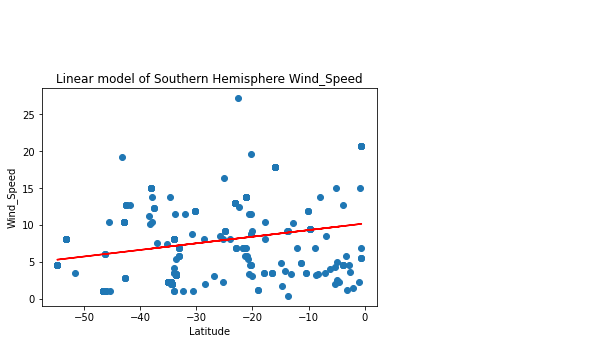

The correlation coefficient between Latitude and Wind_Speed value is 0.27


In [57]:
# Add the linear regression equation and line to plot for Sorthen Hemisphere Wind_Speed
# x and y axis of the scatter plot

# casting using astype of method
x_values  = southern_hemisphere_df["Latitude"].astype(str).astype(float)
y_values = southern_hemisphere_df['Wind_Speed']


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,38),fontsize=15,color="red")
plt.title("Linear model of Southern Hemisphere Wind_Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Caculate correlation coefficient
corr_coefficient = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation coefficient between Latitude and Wind_Speed value is {corr_coefficient}')

## Observation:  Southern Hemisphere Linear regression (Lattitude vs. Wind Speed)
* The above linear regression model shows the relationship of Latitude and Wind speed. 

* The correlation coefficient is 0.27. That means, there is weak positive relationship between two variables lattitude and
Wind speed in the Southern Hemisphere. 